In [1]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from astromodels import *
import astropy.units as u
from threeML import *
from astropy.io import fits
import scipy.optimize as sc
import csv

from tqdm.autonotebook import tqdm as tqdm

import glob,os



[WARNING ] The naima package is not available. Models that depend on it will not be available
[WARNING ] The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it will not be available.
[WARNING ] The ebltable package is not available. Models that depend on it will not be available
[INFO    ] Starting 3ML!
[WARNING ] no display variable set. using backend for graphics without display (agg)
[WARNING ] ROOT minimizer not available
[WARNING ] Multinest minimizer not available
[WARNING ] PyGMO is not available
[WARNING ] The cthreeML package is not installed. You will not be able to use plugins which require the C/C++ interface (currently HAWC)
[WARNING ] Could not import plugin FermiLATLike.py. Do you have the relative instrument software installed and configured?
[WARNING ] Could not import plugin HAWCLike.py. Do you have the relative instrument software installed and configured?
[WARNING ] No fermitools installed
[WARNING ] Env. variable OMP_NUM_THREADS is not set.

# Generate Band Model from Jourdain & Roques

Define Band Model with Parameters from Jourdain & Roques 2020

In [2]:
#Band().display()
Band_SE_Rev43_1096 = Band()

#Band_SE_Rev43_1096.K = 8
Band_SE_Rev43_1096.K = 7.53*10**(-4)*20**2
#print(Band_SE_Rev43_1096.K.value)
Band_SE_Rev43_1096.K.unit =  u.keV**(-1) * u.cm**(-1) * u.cm**(-1) * u.s**(-1)
#print(Band_SE_Rev43_1096.K.unit)

Band_SE_Rev43_1096.K.fix = True

Band_SE_Rev43_1096.alpha.min_value = -3
Band_SE_Rev43_1096.alpha = -1.99
Band_SE_Rev43_1096.alpha.fix = True

Band_SE_Rev43_1096.beta = -2.31
Band_SE_Rev43_1096.beta.fix = True

Band_SE_Rev43_1096.xp = 565
Band_SE_Rev43_1096.xp.unit = u.keV
print(Band_SE_Rev43_1096.xp.unit)

Band_SE_Rev43_1096.xp.fix = True


#Band_SE_Rev43_1096.set_units(in_x_unit = u.keV, in_y_unit = u.keV**2 / (u.cm**2 * u.s * u.keV))
print(Band_SE_Rev43_1096.x_unit)
print(Band_SE_Rev43_1096.y_unit)


keV
None
None


EXTRACT JOURDAIN DATA

In [3]:
###########################
# EXTRACT JOURDAIN DATA #
############################
ME_Spectrum_Rev43_1096_pd = pd.read_csv('ME_Spectrum_Rev43-1096.csv', sep = ';', header = None, dtype = str)
ME_Spectrum_Rev43_1096_Err_x_pd = pd.read_csv('ME_Spectrum_Rev43-1096_Err_x.csv', sep = ';', header = None, dtype = str)
ME_Spectrum_Rev43_1096_Err_y_pd = pd.read_csv('ME_Spectrum_Rev43-1096_Err_y.csv', sep = ';', header = None, dtype = str)

SE_Spectrum_Rev43_1096_pd = pd.read_csv('SE_Spectrum_Rev43-1096.csv', sep = ';', header = None, dtype = str)
SE_Spectrum_Rev43_1096_Err_x_pd = pd.read_csv('SE_Spectrum_Rev43-1096_Err_x.csv', sep = ';', header = None, dtype = str)
SE_Spectrum_Rev43_1096_Err_y_pd = pd.read_csv('SE_Spectrum_Rev43-1096_Err_y.csv', sep = ';', header = None, dtype = str)


ME_Spectrum_Rev1214_2135_pd = pd.read_csv('ME_Spectrum_Rev1214-2135.csv', sep = ';', header = None, dtype = str)
ME_Spectrum_Rev1214_2135_Err_x_pd = pd.read_csv('ME_Spectrum_Rev1214-2135_Err_x.csv', sep = ';', header = None, dtype = str)
ME_Spectrum_Rev1214_2135_Err_y_pd = pd.read_csv('ME_Spectrum_Rev1214-2135_Err_y.csv', sep = ';', header = None, dtype = str)

SE_Spectrum_Rev1214_2135_pd = pd.read_csv('SE_Spectrum_Rev1214-2135.csv', sep = ';', header = None, dtype = str)
SE_Spectrum_Rev1214_2135_Err_x_pd = pd.read_csv('SE_Spectrum_Rev1214-2135_Err_x.csv', sep = ';', header = None, dtype = str)
SE_Spectrum_Rev1214_2135_Err_y_pd = pd.read_csv('SE_Spectrum_Rev1214-2135_Err_y.csv', sep = ';', header = None, dtype = str)

In [4]:
ME_Spectrum_Rev43_1096_x = []
for i in range(len(np.array(ME_Spectrum_Rev43_1096_pd[0].values))):
    ME_Spectrum_Rev43_1096_x.append((np.array(ME_Spectrum_Rev43_1096_pd[0].values)[i]))
#print(ME_Spectrum_Rev43_1096_x)

ME_Spectrum_Rev43_1096_y = []
for i in range(len(np.array(ME_Spectrum_Rev43_1096_pd[1].values))):
    ME_Spectrum_Rev43_1096_y.append(np.array(ME_Spectrum_Rev43_1096_pd[1].values)[i])
#print(ME_Spectrum_Rev43_1096_y)

ME_Spectrum_Rev43_1096_Err_x = []
for i in range(len(np.array(ME_Spectrum_Rev43_1096_Err_x_pd[0].values))):
    ME_Spectrum_Rev43_1096_Err_x.append(np.array(ME_Spectrum_Rev43_1096_Err_x_pd[0].values)[i])
#print(ME_Spectrum_Rev43_1096_Err_x)

ME_Spectrum_Rev43_1096_Err_y = []
for i in range(len(np.array(ME_Spectrum_Rev43_1096_Err_y_pd[1].values))):
    ME_Spectrum_Rev43_1096_Err_y.append(np.array(ME_Spectrum_Rev43_1096_Err_y_pd[1].values)[i])
#print(ME_Spectrum_Rev43_1096_Err_y)



SE_Spectrum_Rev43_1096_x = []
for i in range(len(np.array(SE_Spectrum_Rev43_1096_pd[0].values))):
    SE_Spectrum_Rev43_1096_x.append((np.array(SE_Spectrum_Rev43_1096_pd[0].values)[i]))
#print(SE_Spectrum_Rev43_1096_x)

SE_Spectrum_Rev43_1096_y = []
for i in range(len(np.array(SE_Spectrum_Rev43_1096_pd[1].values))):
    SE_Spectrum_Rev43_1096_y.append(np.array(SE_Spectrum_Rev43_1096_pd[1].values)[i])
#print(SE_Spectrum_Rev43_1096_y)

SE_Spectrum_Rev43_1096_Err_x = []
for i in range(len(np.array(SE_Spectrum_Rev43_1096_Err_x_pd[0].values))):
    SE_Spectrum_Rev43_1096_Err_x.append(np.array(SE_Spectrum_Rev43_1096_Err_x_pd[0].values)[i])
#print(SE_Spectrum_Rev43_1096_Err_x)

SE_Spectrum_Rev43_1096_Err_y = []
for i in range(len(np.array(SE_Spectrum_Rev43_1096_Err_y_pd[1].values))):
    SE_Spectrum_Rev43_1096_Err_y.append(np.array(SE_Spectrum_Rev43_1096_Err_y_pd[1].values)[i])
#print(SE_Spectrum_Rev43_1096_Err_y)




ME_Spectrum_Rev1214_2135_x = []
for i in range(len(np.array(ME_Spectrum_Rev1214_2135_pd[0].values))):
    ME_Spectrum_Rev1214_2135_x.append((np.array(ME_Spectrum_Rev1214_2135_pd[0].values)[i]))
#print(ME_Spectrum_Rev1214_2135_x)

ME_Spectrum_Rev1214_2135_y = []
for i in range(len(np.array(ME_Spectrum_Rev1214_2135_pd[1].values))):
    ME_Spectrum_Rev1214_2135_y.append(np.array(ME_Spectrum_Rev1214_2135_pd[1].values)[i])
#print(ME_Spectrum_Rev1214_2135_y)

ME_Spectrum_Rev1214_2135_Err_x = []
for i in range(len(np.array(ME_Spectrum_Rev1214_2135_Err_x_pd[0].values))):
    ME_Spectrum_Rev1214_2135_Err_x.append(np.array(ME_Spectrum_Rev1214_2135_Err_x_pd[0].values)[i])
#print(ME_Spectrum_Rev1214_2135_Err_x)

ME_Spectrum_Rev1214_2135_Err_y = []
for i in range(len(np.array(ME_Spectrum_Rev1214_2135_Err_y_pd[1].values))):
    ME_Spectrum_Rev1214_2135_Err_y.append(np.array(ME_Spectrum_Rev1214_2135_Err_y_pd[1].values)[i])
#print(ME_Spectrum_Rev1214_2135_Err_y)



SE_Spectrum_Rev1214_2135_x = []
for i in range(len(np.array(SE_Spectrum_Rev1214_2135_pd[0].values))):
    SE_Spectrum_Rev1214_2135_x.append((np.array(SE_Spectrum_Rev1214_2135_pd[0].values)[i]))
#print(SE_Spectrum_Rev1214_2135_x)

SE_Spectrum_Rev1214_2135_y = []
for i in range(len(np.array(SE_Spectrum_Rev1214_2135_pd[1].values))):
    SE_Spectrum_Rev1214_2135_y.append(np.array(SE_Spectrum_Rev1214_2135_pd[1].values)[i])
#print(SE_Spectrum_Rev1214_2135_y)

SE_Spectrum_Rev1214_2135_Err_x = []
for i in range(len(np.array(SE_Spectrum_Rev1214_2135_Err_x_pd[0].values))):
    SE_Spectrum_Rev1214_2135_Err_x.append(np.array(SE_Spectrum_Rev1214_2135_Err_x_pd[0].values)[i])
#print(SE_Spectrum_Rev1214_2135_Err_x)

SE_Spectrum_Rev1214_2135_Err_y = []
for i in range(len(np.array(SE_Spectrum_Rev1214_2135_Err_y_pd[1].values))):
    SE_Spectrum_Rev1214_2135_Err_y.append(np.array(SE_Spectrum_Rev1214_2135_Err_y_pd[1].values)[i])
#print(SE_Spectrum_Rev1214_2135_Err_y)


In [5]:
for i in range(len(ME_Spectrum_Rev43_1096_x)):
    ME_Spectrum_Rev43_1096_x[i] = ME_Spectrum_Rev43_1096_x[i].replace(',','.')
    ME_Spectrum_Rev43_1096_x[i] = float(ME_Spectrum_Rev43_1096_x[i])
#    print(ME_Spectrum_Rev43_1096_x[i])
#print(ME_Spectrum_Rev43_1096_x)
for i in range(len(ME_Spectrum_Rev43_1096_y)):
    ME_Spectrum_Rev43_1096_y[i] = ME_Spectrum_Rev43_1096_y[i].replace(',','.')
    ME_Spectrum_Rev43_1096_y[i] = float(ME_Spectrum_Rev43_1096_y[i])
#    print(ME_Spectrum_Rev43_1096_y[i])
#print(ME_Spectrum_Rev43_1096_y)
for i in range(len(ME_Spectrum_Rev43_1096_Err_x)):
    ME_Spectrum_Rev43_1096_Err_x[i] = ME_Spectrum_Rev43_1096_Err_x[i].replace(',','.')
    ME_Spectrum_Rev43_1096_Err_x[i] = float(ME_Spectrum_Rev43_1096_Err_x[i])
#    print(ME_Spectrum_Rev43_1096_Err_x[i])
#print(ME_Spectrum_Rev43_1096_Err_x)
for i in range(len(ME_Spectrum_Rev43_1096_Err_y)):
    ME_Spectrum_Rev43_1096_Err_y[i] = ME_Spectrum_Rev43_1096_Err_y[i].replace(',','.')
    ME_Spectrum_Rev43_1096_Err_y[i] = float(ME_Spectrum_Rev43_1096_Err_y[i])
#    print(ME_Spectrum_Rev43_1096_Err_y[i])
#print(ME_Spectrum_Rev43_1096_Err_y)




for i in range(len(SE_Spectrum_Rev43_1096_x)):
    SE_Spectrum_Rev43_1096_x[i] = SE_Spectrum_Rev43_1096_x[i].replace(',','.')
    SE_Spectrum_Rev43_1096_x[i] = float(SE_Spectrum_Rev43_1096_x[i])
#    print(SE_Spectrum_Rev43_1096_x[i])
#print(SE_Spectrum_Rev43_1096_x)
for i in range(len(SE_Spectrum_Rev43_1096_y)):
    SE_Spectrum_Rev43_1096_y[i] = SE_Spectrum_Rev43_1096_y[i].replace(',','.')
    SE_Spectrum_Rev43_1096_y[i] = float(SE_Spectrum_Rev43_1096_y[i])
#    print(SE_Spectrum_Rev43_1096_y[i])
#print(SE_Spectrum_Rev43_1096_y)
for i in range(len(SE_Spectrum_Rev43_1096_Err_x)):
    SE_Spectrum_Rev43_1096_Err_x[i] = SE_Spectrum_Rev43_1096_Err_x[i].replace(',','.')
    SE_Spectrum_Rev43_1096_Err_x[i] = float(SE_Spectrum_Rev43_1096_Err_x[i])
#    print(SE_Spectrum_Rev43_1096_Err_x[i])
#print(SE_Spectrum_Rev43_1096_Err_x)
for i in range(len(SE_Spectrum_Rev43_1096_Err_y)):
    SE_Spectrum_Rev43_1096_Err_y[i] = SE_Spectrum_Rev43_1096_Err_y[i].replace(',','.')
    SE_Spectrum_Rev43_1096_Err_y[i] = float(SE_Spectrum_Rev43_1096_Err_y[i])
#    print(SE_Spectrum_Rev43_1096_Err_y[i])
#print(SE_Spectrum_Rev43_1096_Err_y)





for i in range(len(ME_Spectrum_Rev1214_2135_x)):
    ME_Spectrum_Rev1214_2135_x[i] = ME_Spectrum_Rev1214_2135_x[i].replace(',','.')
    ME_Spectrum_Rev1214_2135_x[i] = float(ME_Spectrum_Rev1214_2135_x[i])
#    print(ME_Spectrum_Rev1214_2135_x[i])
#print(ME_Spectrum_Rev1214_2135_x)
for i in range(len(ME_Spectrum_Rev1214_2135_y)):
    ME_Spectrum_Rev1214_2135_y[i] = ME_Spectrum_Rev1214_2135_y[i].replace(',','.')
    ME_Spectrum_Rev1214_2135_y[i] = float(ME_Spectrum_Rev1214_2135_y[i])
#    print(ME_Spectrum_Rev1214_2135_y[i])
#print(ME_Spectrum_Rev1214_2135_y)
for i in range(len(ME_Spectrum_Rev1214_2135_Err_x)):
    ME_Spectrum_Rev1214_2135_Err_x[i] = ME_Spectrum_Rev1214_2135_Err_x[i].replace(',','.')
    ME_Spectrum_Rev1214_2135_Err_x[i] = float(ME_Spectrum_Rev1214_2135_Err_x[i])
#    print(ME_Spectrum_Rev1214_2135_Err_x[i])
#print(ME_Spectrum_Rev1214_2135_Err_x)
for i in range(len(ME_Spectrum_Rev1214_2135_Err_y)):
    ME_Spectrum_Rev1214_2135_Err_y[i] = ME_Spectrum_Rev1214_2135_Err_y[i].replace(',','.')
    ME_Spectrum_Rev1214_2135_Err_y[i] = float(ME_Spectrum_Rev1214_2135_Err_y[i])
#    print(ME_Spectrum_Rev1214_2135_Err_y[i])
#print(ME_Spectrum_Rev1214_2135_Err_y)




for i in range(len(SE_Spectrum_Rev1214_2135_x)):
    SE_Spectrum_Rev1214_2135_x[i] = SE_Spectrum_Rev1214_2135_x[i].replace(',','.')
    SE_Spectrum_Rev1214_2135_x[i] = float(SE_Spectrum_Rev1214_2135_x[i])
#    print(SE_Spectrum_Rev1214_2135_x[i])
#print(SE_Spectrum_Rev1214_2135_x)
for i in range(len(SE_Spectrum_Rev1214_2135_y)):
    SE_Spectrum_Rev1214_2135_y[i] = SE_Spectrum_Rev1214_2135_y[i].replace(',','.')
    SE_Spectrum_Rev1214_2135_y[i] = float(SE_Spectrum_Rev1214_2135_y[i])
#    print(SE_Spectrum_Rev1214_2135_y[i])
#print(SE_Spectrum_Rev1214_2135_y)
for i in range(len(SE_Spectrum_Rev1214_2135_Err_x)):
    SE_Spectrum_Rev1214_2135_Err_x[i] = SE_Spectrum_Rev1214_2135_Err_x[i].replace(',','.')
    SE_Spectrum_Rev1214_2135_Err_x[i] = float(SE_Spectrum_Rev1214_2135_Err_x[i])
#    print(SE_Spectrum_Rev1214_2135_Err_x[i])
#print(SE_Spectrum_Rev1214_2135_Err_x)
for i in range(len(SE_Spectrum_Rev1214_2135_Err_y)):
    SE_Spectrum_Rev1214_2135_Err_y[i] = SE_Spectrum_Rev1214_2135_Err_y[i].replace(',','.')
    SE_Spectrum_Rev1214_2135_Err_y[i] = float(SE_Spectrum_Rev1214_2135_Err_y[i])
#    print(SE_Spectrum_Rev1214_2135_Err_y[i])
#print(SE_Spectrum_Rev1214_2135_Err_y)


In [6]:
ME_Spectrum_Rev43_1096_Errx = []
for i in range(len(ME_Spectrum_Rev43_1096_x)):
    ME_Spectrum_Rev43_1096_Errx.append(ME_Spectrum_Rev43_1096_x[i] - ME_Spectrum_Rev43_1096_Err_x[i])
print(ME_Spectrum_Rev43_1096_Errx)    
ME_Spectrum_Rev43_1096_Erry = []
for i in range(len(ME_Spectrum_Rev43_1096_y)):
    ME_Spectrum_Rev43_1096_Erry.append(ME_Spectrum_Rev43_1096_y[i] - ME_Spectrum_Rev43_1096_Err_y[i])
print(ME_Spectrum_Rev43_1096_Erry)  

SE_Spectrum_Rev43_1096_Errx = []
for i in range(len(SE_Spectrum_Rev43_1096_x)):
    SE_Spectrum_Rev43_1096_Errx.append(SE_Spectrum_Rev43_1096_x[i] - SE_Spectrum_Rev43_1096_Err_x[i])
print(SE_Spectrum_Rev43_1096_Errx)    
SE_Spectrum_Rev43_1096_Erry = []
for i in range(len(SE_Spectrum_Rev43_1096_y)):
    SE_Spectrum_Rev43_1096_Erry.append(SE_Spectrum_Rev43_1096_y[i] - SE_Spectrum_Rev43_1096_Err_y[i])
print(SE_Spectrum_Rev43_1096_Erry)   

ME_Spectrum_Rev1214_2135_Errx = []
for i in range(len(ME_Spectrum_Rev1214_2135_x)):
    ME_Spectrum_Rev1214_2135_Errx.append(ME_Spectrum_Rev1214_2135_x[i] - ME_Spectrum_Rev1214_2135_Err_x[i])
print(ME_Spectrum_Rev1214_2135_Errx)    
ME_Spectrum_Rev1214_2135_Erry = []
for i in range(len(ME_Spectrum_Rev1214_2135_y)):
    ME_Spectrum_Rev1214_2135_Erry.append(ME_Spectrum_Rev1214_2135_y[i] - ME_Spectrum_Rev1214_2135_Err_y[i])
print(ME_Spectrum_Rev1214_2135_Erry)  

SE_Spectrum_Rev1214_2135_Errx = []
for i in range(len(SE_Spectrum_Rev1214_2135_x)):
    SE_Spectrum_Rev1214_2135_Errx.append(SE_Spectrum_Rev1214_2135_x[i] - SE_Spectrum_Rev1214_2135_Err_x[i])
print(SE_Spectrum_Rev1214_2135_Errx)    
SE_Spectrum_Rev1214_2135_Erry = []
for i in range(len(SE_Spectrum_Rev1214_2135_y)):
    SE_Spectrum_Rev1214_2135_Erry.append(SE_Spectrum_Rev1214_2135_y[i] - SE_Spectrum_Rev1214_2135_Err_y[i])
print(SE_Spectrum_Rev1214_2135_Erry)   

[12.965308852541654, 13.942745820007843, 16.713367060773038, 21.777618002439, 26.92229708217161, 35.01761830545058, 52.13501490203396, 55.034249028369345, 96.95262463773724, 109.80350868726009, 561.1558389920649]
[0.23656236531029595, 0.18673094206272367, 0.1350799284272357, 0.14749311613204608, 0.15774969275926054, 0.18984338102839082, 0.26498373568083133, 0.3085878530203976, 0.3830537193195753, 0.5555992819146969, 0.7440355072331544]
[0.8125757253544208, 0.7612610068527275, 0.6796730022267319, 0.9603711615513149, 0.8828073344963592, 1.072027979782952, 0.969443101910155, 1.1823355676011502, 1.4209513873673174, 1.707463180629027, 1.6064710651363612, 2.1564682778879316, 1.3233863951814442, 1.8949013287963226, 1.9792930206533228, 2.6915064394519277, 1.585153445231441, 1.3034966836636812, 3.1269695753460667, 3.3113402067516375, 2.696957806014936, 1.510378038814693, 2.930680220176285, 2.5689694744707054, 4.248798394033869, 3.896352830156161, 4.1100148100558584, 4.288235741222536, 0.4522890

Extract Own Data

In [7]:
###########################
# EXTRACT Own DATA #
############################

f_SE_rev43_1170 = fits.open('../fit_Crab_SE_02_rev43-1170/spectra_Crab.fits')
DFLUX_SE_rev43_1170 = f_SE_rev43_1170[2].data['DFLUX']
DFLUX_ERR_SE_rev43_1170 = f_SE_rev43_1170[2].data['DFLUX_ERR']

f_PSD_rev43_1170 = fits.open('../fit_Crab_PSD_02_rev43-1170/spectra_Crab.fits')
DFLUX_PSD_rev43_1170 = f_PSD_rev43_1170[2].data['DFLUX']
DFLUX_ERR_PSD_rev43_1170 = f_PSD_rev43_1170[2].data['DFLUX_ERR']

f_SE_rev1171_2135 = fits.open('../fit_Crab_SE_02_rev1171-2135/spectra_Crab.fits')
DFLUX_SE_rev1171_2135 = f_SE_rev1171_2135[2].data['DFLUX']
DFLUX_ERR_SE_rev1171_2135 = f_SE_rev1171_2135[2].data['DFLUX_ERR']

f_PSD_rev1171_2135 = fits.open('../fit_Crab_PSD_02_rev1171-2135/spectra_Crab.fits')
DFLUX_PSD_rev1171_2135 = f_PSD_rev1171_2135[2].data['DFLUX']
DFLUX_ERR_PSD_rev1171_2135 = f_PSD_rev1171_2135[2].data['DFLUX_ERR']


In [8]:
g_SE_rev43_1170 = fits.open('../fit_Crab_SE_02_rev43-1170/spectral_response.rmf.fits')
E_MIN_SE_rev43_1170 = g_SE_rev43_1170[3].data['E_MIN']
E_MAX_SE_rev43_1170 = g_SE_rev43_1170[3].data['E_MAX']
E_MEAN_SE_rev43_1170 = (E_MIN_SE_rev43_1170+E_MAX_SE_rev43_1170)/2
E_ERR_SE_rev43_1170 = E_MAX_SE_rev43_1170 - E_MIN_SE_rev43_1170 
print((E_MEAN_SE_rev43_1170))
print(E_ERR_SE_rev43_1170)

g_PSD_rev43_1170 = fits.open('../fit_Crab_PSD_02_rev43-1170/spectral_response.rmf.fits')
E_MIN_PSD_rev43_1170 = g_PSD_rev43_1170[3].data['E_MIN']
E_MAX_PSD_rev43_1170 = g_PSD_rev43_1170[3].data['E_MAX']
E_MEAN_PSD_rev43_1170 = (E_MIN_PSD_rev43_1170+E_MAX_PSD_rev43_1170)/2
E_ERR_PSD_rev43_1170 = E_MAX_PSD_rev43_1170 - E_MIN_PSD_rev43_1170

g_SE_rev1171_2135 = fits.open('../fit_Crab_SE_02_rev1171-2135/spectral_response.rmf.fits')
E_MIN_SE_rev1171_2135 = g_SE_rev1171_2135[3].data['E_MIN']
E_MAX_SE_rev1171_2135 = g_SE_rev1171_2135[3].data['E_MAX']
E_MEAN_SE_rev1171_2135 = (E_MIN_SE_rev1171_2135+E_MAX_SE_rev1171_2135)/2
E_ERR_SE_rev1171_2135 = E_MAX_SE_rev1171_2135 - E_MIN_SE_rev1171_2135

g_PSD_rev1171_2135 = fits.open('../fit_Crab_PSD_02_rev1171-2135/spectral_response.rmf.fits')
E_MIN_PSD_rev1171_2135 = g_PSD_rev1171_2135[3].data['E_MIN']
E_MAX_PSD_rev1171_2135 = g_PSD_rev1171_2135[3].data['E_MAX']
E_MEAN_PSD_rev1171_2135 = (E_MIN_PSD_rev1171_2135+E_MAX_PSD_rev1171_2135)/2
E_ERR_PSD_rev1171_2135 = E_MAX_PSD_rev1171_2135 - E_MIN_PSD_rev1171_2135


[ 20.75  22.5   24.5   26.5   28.75  31.25  34.    37.    40.25  43.75
  47.5   51.75  56.25  61.    66.25  72.    78.25  85.25  92.75 100.75
 109.5  119.   129.25 140.25 152.5  165.75 180.   195.75 212.75 231.
 251.   272.75 296.25 322.   350.   380.25 413.   448.75 487.75 511.
 557.  ]
[ 1.5  2.   2.   2.   2.5  2.5  3.   3.   3.5  3.5  4.   4.5  4.5  5.
  5.5  6.   6.5  7.5  7.5  8.5  9.  10.  10.5 11.5 13.  13.5 15.  16.5
 17.5 19.  21.  22.5 24.5 27.  29.  31.5 34.  37.5 40.5  6.  86. ]


In [9]:
FLUX_SE_rev43_1170 = E_MEAN_SE_rev43_1170*E_ERR_SE_rev43_1170*DFLUX_SE_rev43_1170
FLUX_SE_rev43_1170_ERR = E_MEAN_SE_rev43_1170*E_ERR_SE_rev43_1170*DFLUX_ERR_SE_rev43_1170

FLUX_PSD_rev43_1170 = E_MEAN_PSD_rev43_1170*E_ERR_PSD_rev43_1170*DFLUX_PSD_rev43_1170
FLUX_PSD_rev43_1170_ERR = E_MEAN_PSD_rev43_1170*E_ERR_PSD_rev43_1170*DFLUX_ERR_PSD_rev43_1170

#FLUX_SE_rev1171_2135 = E_MEAN_SE_rev1171_2135*E_ERR_SE_rev1171_2135*DFLUX_SE_rev1171_2135
#FLUX_SE_rev1171_2135_ERR = E_MEAN_SE_rev1171_2135*E_ERR_SE_rev1171_2135*DFLUX_ERR_SE_rev1171_2135

#FLUX_PSD_rev1171_2135 = E_MEAN_PSD_rev1171_2135*E_ERR_PSD_rev1171_2135*DFLUX_PSD_rev1171_2135
#FLUX_PSD_rev1171_2135_ERR = E_MEAN_PSD_rev1171_2135*E_ERR_PSD_rev1171_2135*DFLUX_ERR_PSD_rev1171_2135

In [10]:
#FLUX_SE_rev43_1170 = E_MEAN_SE_rev43_1170**2*DFLUX_SE_rev43_1170
#FLUX_SE_rev43_1170_ERR = E_MEAN_SE_rev43_1170**2*DFLUX_ERR_SE_rev43_1170

#FLUX_PSD_rev43_1170 = E_MEAN_PSD_rev43_1170**2*DFLUX_PSD_rev43_1170
#FLUX_PSD_rev43_1170_ERR = E_MEAN_PSD_rev43_1170**2*DFLUX_ERR_PSD_rev43_1170

FLUX_SE_rev1171_2135 = E_MEAN_SE_rev1171_2135**2*DFLUX_SE_rev1171_2135
FLUX_SE_rev1171_2135_ERR = E_MEAN_SE_rev1171_2135**2*DFLUX_ERR_SE_rev1171_2135

FLUX_PSD_rev1171_2135 = E_MEAN_PSD_rev1171_2135**2*DFLUX_PSD_rev1171_2135
FLUX_PSD_rev1171_2135_ERR = E_MEAN_PSD_rev1171_2135**2*DFLUX_ERR_PSD_rev1171_2135

# OWN DATA

REV 43-1170 & REV 1171-2135

In [11]:

#############
# DATASETS #
############
# SE #
######
crab_SE_Rev1171_2135 = OGIPLike("crab_SE_Rev1171_2135",
                   observation='/home/jziegler/cookbook/SPI_cookbook/examples/Crab_SepRev/fit_Crab_SE_02_rev1171-2135/spectra_Crab.fits',
                   response='/home/jziegler/cookbook/SPI_cookbook/examples/Crab_SepRev/fit_Crab_SE_02_rev1171-2135/spectral_response.rmf.fits')

crab_SE_Rev43_1170 = OGIPLike("crab_SE_Rev43_1170",
                   observation='/home/jziegler/cookbook/SPI_cookbook/examples/Crab_SepRev/fit_Crab_SE_02_rev43-1170/spectra_Crab.fits',
                   response='/home/jziegler/cookbook/SPI_cookbook/examples/Crab_SepRev/fit_Crab_SE_02_rev43-1170/spectral_response.rmf.fits')

###############
# SE CHANNELS #
###############
crab_SE_Rev1171_2135.set_active_measurements('50 - 465')
crab_SE_Rev43_1170.set_active_measurements('50 - 465')

#crab_SE_Rev1171_2135.set_active_measurements('50 - 510')
#crab_SE_Rev43_1170.set_active_measurements('50 - 510')

#######
# PSD #
#######
crab_PSD_Rev1171_2135 = OGIPLike("crab_PSD_Rev1171_2135",
                    observation='/home/jziegler/cookbook/SPI_cookbook/examples/Crab_SepRev/fit_Crab_PSD_02_rev1171-2135/spectra_Crab.fits',
                   response='/home/jziegler/cookbook/SPI_cookbook/examples/Crab_SepRev/fit_Crab_PSD_02_rev1171-2135/spectral_response.rmf.fits')
crab_PSD_Rev43_1170 = OGIPLike("crab_PSD_Rev43_1170",
                   observation='/home/jziegler/cookbook/SPI_cookbook/examples/Crab_SepRev/fit_Crab_PSD_02_rev43-1170/spectra_Crab.fits',
                   response='/home/jziegler/cookbook/SPI_cookbook/examples/Crab_SepRev/fit_Crab_PSD_02_rev43-1170/spectral_response.rmf.fits')

################
# PSD CHANNELS #
################
crab_PSD_Rev1171_2135.set_active_measurements('465 - 2000')
crab_PSD_Rev43_1170.set_active_measurements('465 - 2000')

#crab_PSD_Rev1171_2135.set_active_measurements('510 - 2000')
#crab_PSD_Rev43_1170.set_active_measurements('510 - 2000')

##################
# PSD EFFICIENCY #
##################
#crab_PSD_Rev1171_2135.fix_effective_area_correction(0.85)
#crab_PSD_Rev43_1170.fix_effective_area_correction(0.85)

crab_PSD_Rev1171_2135.use_effective_area_correction(0.1, 0.9)
crab_PSD_Rev43_1170.use_effective_area_correction(0.1, 0.9)


##################
# SPECTRAL MODEL #
##################
#spec = Broken_powerlaw()
spec = Band()

##############################
# DEFINITION OF POINT SOURCE #
##############################
ps = PointSource('crab',l=0,b=0,spectral_shape=spec)

####################
# MODEL DEFINITION #
####################
ps_model_Rev1171_2135 = Model(ps)
ps_model_Rev43_1170 = Model(ps)


####################
# FIXED PARAMETERS #
#####################
#ps_model_Rev1171_2135.crab.spectrum.main.Broken_powerlaw.xb = 100
#ps_model_Rev1171_2135.crab.spectrum.main.Broken_powerlaw.xb.fix = False

ps_model_Rev1171_2135.crab.spectrum.main.Band.xp = 500
ps_model_Rev1171_2135.crab.spectrum.main.Band.xp.fix = False

#ps_model_Rev43_1170.crab.spectrum.main.Broken_powerlaw.xb = 100
#ps_model_Rev43_1170.crab.spectrum.main.Broken_powerlaw.xb.fix = False

ps_model_Rev43_1170.crab.spectrum.main.Band.xp = 500
ps_model_Rev43_1170.crab.spectrum.main.Band.xp.fix = False


#################
# DISPLAY MODEL #
#################
ps_model_Rev1171_2135.display(complete=True)

ps_model_Rev43_1170.display(complete=True)

###################
# DATA DEFINITION #
###################
ps_data_Rev1171_2135 = DataList(crab_SE_Rev1171_2135, crab_PSD_Rev1171_2135)
ps_data_Rev43_1170 = DataList(crab_SE_Rev43_1170, crab_PSD_Rev43_1170)




[WARNING ] Found TSTOP and TELAPSE. This file is invalid. Using TSTOP.
[WARNING ] FILTER is not set. This is not a compliant OGIP file. Assuming no FILTER.
[WARNING ] The response is in an extension called MATRIX, which usually means you also need an ancillary file (ARF) which you didn't provide. You should refer to the documentation  of the instrument and make sure you don't need an ARF.
[INFO    ] Auto-probed noise models:
[INFO    ] - observation: gaussian
[INFO    ] - background: None
[WARNING ] Found TSTOP and TELAPSE. This file is invalid. Using TSTOP.
[WARNING ] FILTER is not set. This is not a compliant OGIP file. Assuming no FILTER.
[WARNING ] The response is in an extension called MATRIX, which usually means you also need an ancillary file (ARF) which you didn't provide. You should refer to the documentation  of the instrument and make sure you don't need an ARF.
[INFO    ] Auto-probed noise models:
[INFO    ] - observation: gaussian
[INFO    ] - background: None
[INFO    ] R

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (4):
--------------------

                                value min_value max_value            unit
crab.spectrum.main.Band.K      0.0001      None      None  keV-1 s-1 cm-2
crab.spectrum.main.Band.alpha    -1.0      -1.5       3.0                
crab.spectrum.main.Band.xp      500.0      10.0      None             keV
crab.spectrum.main.Band.beta     -2.0      -5.0      -1.6                

Fixed parameters (3):
---------------------

                             value min_value max_value unit
crab.position.l                0.0       0.0     360.0  deg
crab.position.b                0.0     -90.0      90.0  deg
crab.spectrum.main.Band.piv  100.0      None      None  keV

Properties (0):
--------------------

(none)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (4):
--------------------

                                value min_value max_value            unit
crab.spectrum.main.Band.K      0.0001      None      None  keV-1 s-1 cm-2
crab.spectrum.main.Band.alpha    -1.0      -1.5       3.0                
crab.spectrum.main.Band.xp      500.0      10.0      None             keV
crab.spectrum.main.Band.beta     -2.0      -5.0      -1.6                

Fixed parameters (3):
---------------------

                             value min_value max_value unit
crab.position.l                0.0       0.0     360.0  deg
crab.position.b                0.0     -90.0      90.0  deg
crab.spectrum.main.Band.piv  100.0      None      None  keV

Properties (0):
--------------------

(none)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

# Combined Spectrum Plot

In [12]:
################
# BAYESIAN FIT #
################

import warnings
warnings.filterwarnings("ignore")

ps_model_Rev43_1170.crab.spectrum.main.Band.xp.prior = Uniform_prior(lower_bound=10, upper_bound=1000)
ps_model_Rev43_1170.crab.spectrum.main.Band.K.prior = Log_uniform_prior(lower_bound=1e-4, upper_bound=10)
ps_model_Rev43_1170.crab.spectrum.main.Band.alpha.prior = Uniform_prior(lower_bound=-1.0, upper_bound=2.5)
ps_model_Rev43_1170.crab.spectrum.main.Band.beta.prior = Uniform_prior(lower_bound=-2.4, upper_bound=-2)

#ps_model_Rev43_1170.crab.spectrum.main.Broken_powerlaw.xb.prior = Uniform_prior(lower_bound=10, upper_bound=1000)
#ps_model_Rev43_1170.crab.spectrum.main.Broken_powerlaw.K.prior = Log_uniform_prior(lower_bound=1e-4, upper_bound=10)
#ps_model_Rev43_1170.crab.spectrum.main.Broken_powerlaw.alpha.prior = Uniform_prior(lower_bound=-1.0, upper_bound=2.5)
#ps_model_Rev43_1170.crab.spectrum.main.Broken_powerlaw.beta.prior = Uniform_prior(lower_bound=-2.5, upper_bound=-2)

ps_bs_Rev43_1170 = BayesianAnalysis(ps_model_Rev43_1170, ps_data_Rev43_1170)
ps_bs_Rev43_1170.set_sampler("emcee")
ps_bs_Rev43_1170.sampler.setup(n_iterations=2000,n_burn_in=5000,n_walkers=20)
ps_samples_Rev43_1170 = ps_bs_Rev43_1170.sample(quiet=False)

# getting the samples
ps_bs_samples_Rev43_1170 = ps_bs_Rev43_1170.results.samples


[INFO    ] sampler set to emcee


  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

[INFO    ] Mean acceptance fraction: 0.3244999999999999
Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
crab.spectrum.main.Band.K,(3.9 -0.5 +0.4) x 10^-3,1 / (cm2 keV s)
crab.spectrum.main.Band.alpha,(-9.1 +/- 0.7) x 10^-1,
crab.spectrum.main.Band.xp,(5.59 +/- 0.09) x 10,keV
crab.spectrum.main.Band.beta,-2.183 +/- 0.004,
cons_crab_PSD_Rev43_1170,(4.89 -0.23 +0.22) x 10^-1,



Values of -log(posterior) at the minimum:



,-log(posterior)
crab_PSD_Rev43_1170,-34.532122
crab_SE_Rev43_1170,-114.017755
total,-148.549877



Values of statistical measures:



,statistical measures
AIC,308.721375
BIC,315.905754
DIC,221.139992
PDIC,-93.118260


In [13]:
#ar2 = ps_bs.results
#fig = ar2.corner_plot()
#plt.savefig('Crab_spectrum_Jourdain_Data_Bayesian_Corner_Plot.pdf')




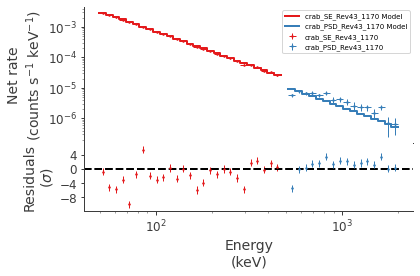

In [14]:
#######################
# PLOT DATA AND MODEL #
#######################
plt.figure()
display_spectrum_model_counts(ps_bs_Rev43_1170,step=True)



In [15]:
ps_model_Rev1171_2135.crab.spectrum.main.Band.xp.prior = Uniform_prior(lower_bound=10, upper_bound=1000)
ps_model_Rev1171_2135.crab.spectrum.main.Band.K.prior = Log_uniform_prior(lower_bound=1e-4, upper_bound=10)
ps_model_Rev1171_2135.crab.spectrum.main.Band.alpha.prior = Uniform_prior(lower_bound=-1.0, upper_bound=2.5)
ps_model_Rev1171_2135.crab.spectrum.main.Band.beta.prior = Uniform_prior(lower_bound=-2.4, upper_bound=-2)

#ps_model_Rev1171_2135.crab.spectrum.main.Broken_powerlaw.xb.prior = Uniform_prior(lower_bound=10, upper_bound=1000)
#ps_model_Rev1171_2135.crab.spectrum.main.Broken_powerlaw.K.prior = Log_uniform_prior(lower_bound=1e-4, upper_bound=10)
#ps_model_Rev1171_2135.crab.spectrum.main.Broken_powerlaw.alpha.prior = Uniform_prior(lower_bound=-1.0, upper_bound=2.5)
#ps_model_Rev1171_2135.crab.spectrum.main.Broken_powerlaw.beta.prior = Uniform_prior(lower_bound=-2.5, upper_bound=-2)

ps_bs_Rev1171_2135 = BayesianAnalysis(ps_model_Rev1171_2135, ps_data_Rev1171_2135)
ps_bs_Rev1171_2135.set_sampler("emcee")
ps_bs_Rev1171_2135.sampler.setup(n_iterations=2000,n_burn_in=5000,n_walkers=20)
ps_samples_Rev1171_2135 = ps_bs_Rev1171_2135.sample(quiet=False)

# getting the samples
ps_bs_samples_Rev1171_2135 = ps_bs_Rev1171_2135.results.samples



[INFO    ] sampler set to emcee


  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

[INFO    ] Mean acceptance fraction: 0.29300000000000004
Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
crab.spectrum.main.Band.K,(4.3 -0.5 +0.7) x 10^-3,1 / (cm2 keV s)
crab.spectrum.main.Band.alpha,(-9.1 -0.7 +0.9) x 10^-1,
crab.spectrum.main.Band.xp,(5.30 -0.11 +0.12) x 10,keV
crab.spectrum.main.Band.beta,-2.1777 -0.0035 +0.004,
cons_crab_PSD_Rev1171_2135,(7.06 +/- 0.26) x 10^-1,



Values of -log(posterior) at the minimum:



,-log(posterior)
crab_PSD_Rev1171_2135,-1.695569
crab_SE_Rev1171_2135,-184.566898
total,-186.262467



Values of statistical measures:



,statistical measures
AIC,384.146555
BIC,391.330934
DIC,298.295908
PDIC,-90.673538


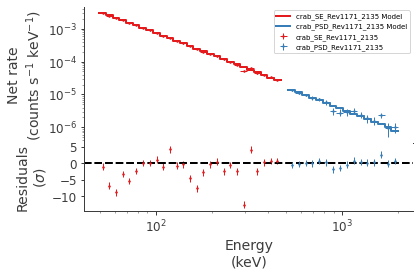

In [16]:
#######################
# PLOT DATA AND MODEL #
#######################
plt.figure()
display_spectrum_model_counts(ps_bs_Rev1171_2135,step=True)

In [17]:
from astromodels import Band
model = Band()

# we won't need to modify the normalization
model.K = 1.


# if no units are provided for the energy grid, keV will be assumed!
energies = np.logspace(1, 3, 50)

In [18]:
from astromodels import TemplateModelFactory
tmf = TemplateModelFactory('crab_SE_Rev1171_2135', 'crab_SE_Rev1171_2135', energies, ['alpha', 'xp', 'beta'])

[WARNING ] Energy unit is not a Quantity instance, so units has not been provided. Using keV.


In [19]:
alpha_grid = np.linspace(-1.5, 1, 15)
beta_grid = np.linspace(-3.5, -1.6, 15)
xp_grid = np.logspace(1, 3, 20)



tmf.define_parameter_grid('alpha', alpha_grid)
tmf.define_parameter_grid('beta', beta_grid)
tmf.define_parameter_grid('xp', xp_grid)

In [20]:
for a in alpha_grid:

    for b in beta_grid:

        for xp in xp_grid:

            # change our model parameters
            model.alpha = a
            model.beta = b
            model.xp = xp

            tmf.add_interpolation_data(model(energies), alpha=a, xp=xp, beta=b)

In [21]:
tmf.save_data(overwrite=True)

from astromodels import TemplateModel

reloaded_table_model = TemplateModel('crab_SE_Rev1171_2135')

In [22]:
# energies and bin widths
#ee = (crab_SE_Rev1171_2135.energy_boundaries[1] + crab_SE_Rev1171_2135.energy_boundaries[0])
#print(ee)
#dee = np.diff(crab_SE_Rev1171_2135.energy_boundaries,axis=0)[0]


ee = E_MAX_SE_rev1171_2135 + E_MIN_SE_rev1171_2135
dee = E_MAX_SE_rev1171_2135 - E_MIN_SE_rev1171_2135



# looping over the samples to create model posteriors

# use 1000 samples in total (can be changed to make faster)
n_use = 1000

# model evaluation at 1000 points logarithmically spaced between 30 and 8000 keV
N_model = 1000
x_model = np.logspace(np.log10(35),np.log10(600),N_model)

# arrays for model space
y_models_total = np.zeros((N_model,n_use))

# arrays for data space
d_models_total = np.zeros((41,n_use))

# and looping
for i in tqdm(range(n_use)):
    
    
    # total spec
    total_spec = TemplateModel("crab_SE_Rev1171_2135")
    y_models_total[:,i] = total_spec.fast_call(x_model)
    tmp_source = PointSource("tmp", l=0, b=0, spectral_shape=total_spec)
    tmp_model = Model(tmp_source)
    crab_SE_Rev1171_2135.set_model(tmp_model)
    total_d = crab_SE_Rev1171_2135.expected_model_rate
    #print(total_d)
    d_models_total[:,i] = total_d/dee





  0%|          | 0/1000 [00:00<?, ?it/s]

Text(0.5, 0, 'Energy [keV]')

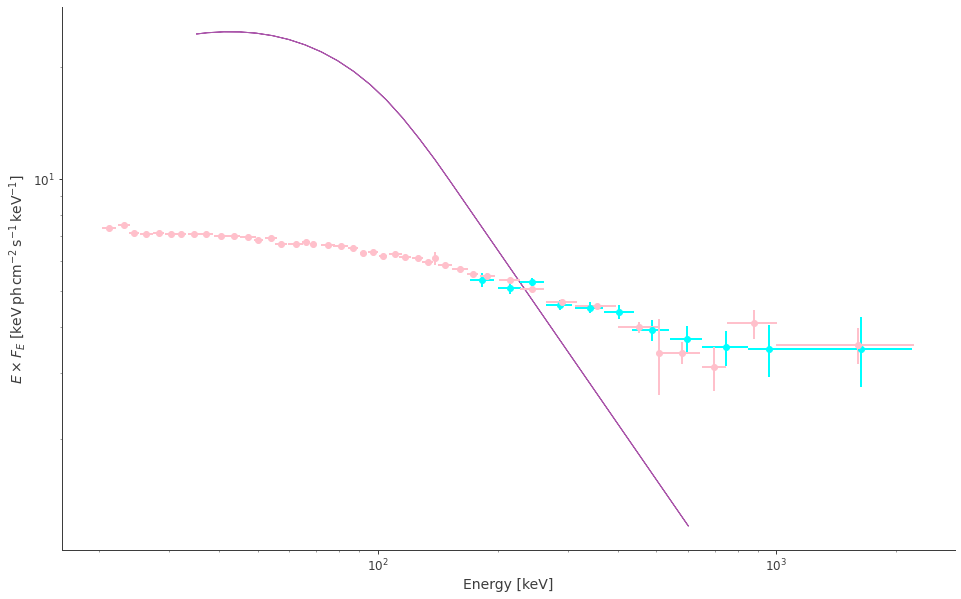

In [23]:
get_ipython().run_line_magic('matplotlib', 'inline')
edx = 1


plt.figure(figsize=(16,10))

levels = [68.3,95.4,99.7]

for level in levels:

    plt.fill_between(x_model,
                    np.percentile(y_models_total,50+level/2,axis=1)*x_model**edx,
                    np.percentile(y_models_total,50-level/2,axis=1)*x_model**edx,
                    color='purple',alpha=0.3)
    
plt.errorbar(ME_Spectrum_Rev43_1096_x,ME_Spectrum_Rev43_1096_y, xerr = ME_Spectrum_Rev43_1096_Errx, yerr = ME_Spectrum_Rev43_1096_Erry, fmt='o', color = 'cyan', label = r'ME Spectrum Jourdain')
plt.errorbar(SE_Spectrum_Rev43_1096_x,SE_Spectrum_Rev43_1096_y, xerr = SE_Spectrum_Rev43_1096_Errx, yerr = SE_Spectrum_Rev43_1096_Erry, fmt='o', color = 'pink', label = r'SE Spectrum Jourdain')
  

plt.xscale('log')
plt.yscale('log')

if edx == 2:
    #plt.ylim(2e-1,5e2)
    plt.ylabel(r'$E^2 \times F_E$ [$\mathrm{keV^2\,ph\,cm^{-2}\,s^{-1}\,keV^{-1}}$]')
elif edx == 1:
    #plt.ylim(2e-3,2e-1)
    plt.ylabel(r'$E \times F_E$ [$\mathrm{keV\,ph\,cm^{-2}\,s^{-1}\,keV^{-1}}$]')
else:
    #plt.ylim(0,2e-3)
    plt.ylabel(r'$F_E$ [$\mathrm{ph\,cm^{-2}\,s^{-1}\,keV^{-1}}$]')
    
plt.xlabel('Energy [keV]')





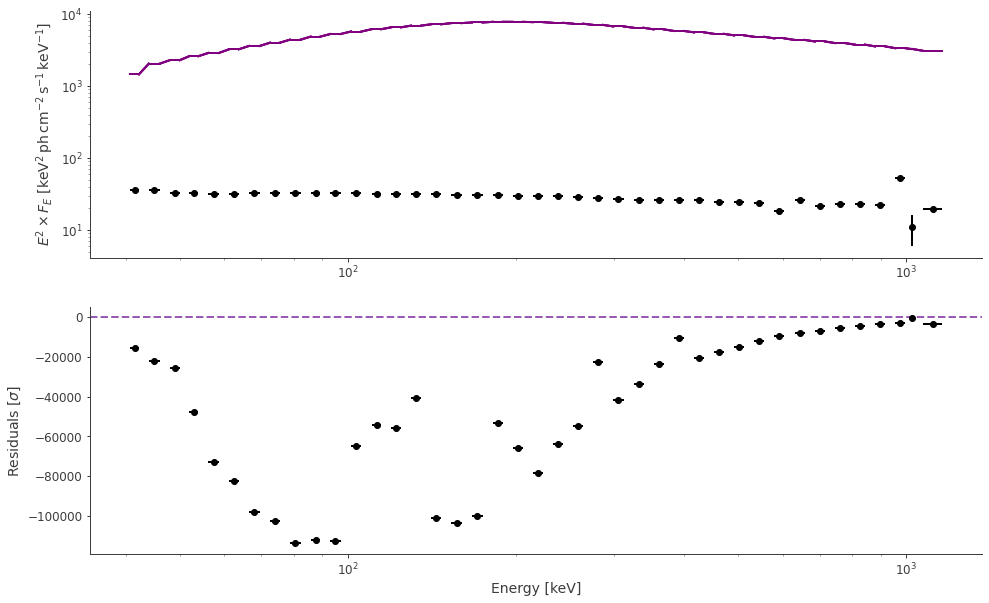

In [24]:
get_ipython().run_line_magic('matplotlib', 'inline')
edx = 2

plt.figure(figsize=(16,10))

plt.subplot(211)
for level in levels:
    
    for i in range(len(ee)):
        
        plt.fill_between([ee[i]-dee[i]/2,ee[i]+dee[i]/2],
                         np.repeat(np.percentile(d_models_total[i,:],50+level/2),2)*ee[i]**edx,
                         np.repeat(np.percentile(d_models_total[i,:],50-level/2),2)*ee[i]**edx,
                         color='purple',alpha=0.3,step='mid')
            
        plt.plot([ee[i]-dee[i]/2,ee[i]+dee[i]/2],
                  np.repeat(np.percentile(d_models_total[i,:],50),2)*ee[i]**edx,
                       linewidth=2,color='purple')
        if i != 40:
                plt.plot([ee[i]+dee[i]/2,ee[i+1]-dee[i+1]/2],
                           [np.percentile(d_models_total[i,:],50)*ee[i]**edx,
                            np.percentile(d_models_total[i+1,:],50)*ee[i+1]**edx],
                           linewidth=2,color='purple')
                
#plt.scatter(ME_Spectrum_Rev1214_2135_x, ME_Spectrum_Rev1214_2135_y, color = 'cyan', label = r'ME Spectrum Jourdain')
#plt.scatter(SE_Spectrum_Rev1214_2135_x, SE_Spectrum_Rev1214_2135_y, color = 'pink', label = r'SE Spectrum Jourdain')


plt.errorbar(ee,crab_SE_Rev1171_2135.source_rate/dee*ee**edx,
                     xerr=dee/2,yerr=crab_SE_Rev1171_2135.source_rate_error/dee*ee**edx,
                     linestyle='',marker='o',color='black')

plt.xscale('log')
plt.yscale('log')
if edx == 2:
    #plt.ylim(2e-1,5e2)
    plt.ylabel(r'$E^2 \times F_E$ [$\mathrm{keV^2\,ph\,cm^{-2}\,s^{-1}\,keV^{-1}}$]')
elif edx == 1:
    #plt.ylim(2e-3,2e-1)
    plt.ylabel(r'$E \times F_E$ [$\mathrm{keV\,ph\,cm^{-2}\,s^{-1}\,keV^{-1}}$]')
else:
    #plt.ylim(0,5e-4)
    plt.ylabel(r'$F_E$ [$\mathrm{ph\,cm^{-2}\,s^{-1}\,keV^{-1}}$]')
    
plt.subplot(212)

plt.errorbar(ee,(crab_SE_Rev1171_2135.source_rate/dee-np.percentile(d_models_total,50,axis=1))/(crab_SE_Rev1171_2135.source_rate_error/dee),
                     xerr=dee/2,yerr=np.repeat(1,41),
                     linestyle='',marker='o',color='black')
plt.ylabel(r'Residuals [$\sigma$]')

plt.xscale('log')
plt.xlabel('Energy [keV]')
#plt.yscale('log')

plt.axhline(0,linestyle='--')




Plot Jourdain & Roques Data

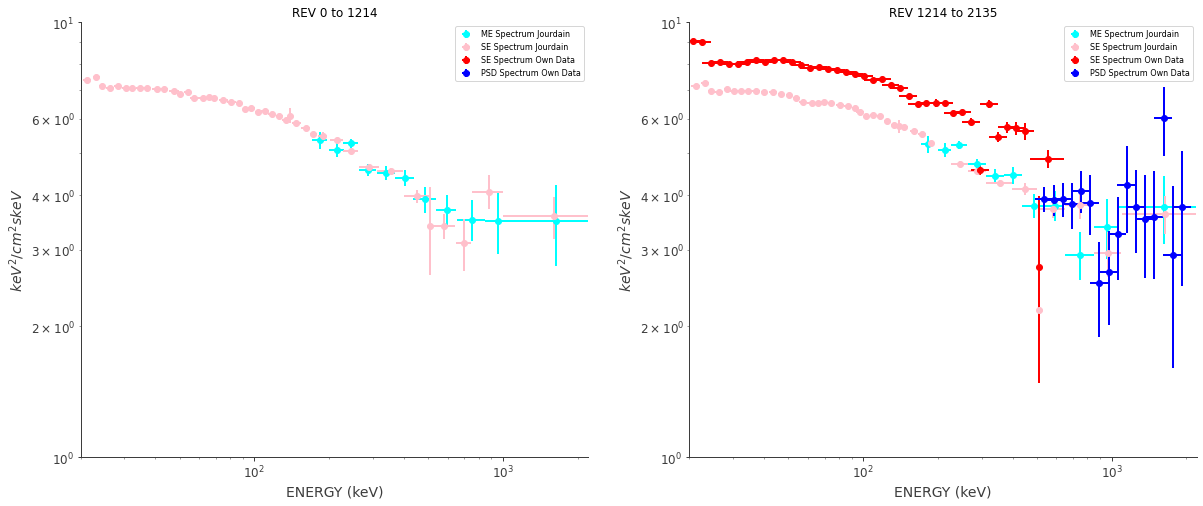

In [25]:
get_ipython().run_line_magic('matplotlib', 'inline')


fig, axis = plt.subplots(1, 2, figsize =(20,8))

axis[0].errorbar(ME_Spectrum_Rev43_1096_x,ME_Spectrum_Rev43_1096_y, xerr = ME_Spectrum_Rev43_1096_Errx, yerr = ME_Spectrum_Rev43_1096_Erry, fmt='o', color = 'cyan', label = r'ME Spectrum Jourdain')
axis[0].errorbar(SE_Spectrum_Rev43_1096_x,SE_Spectrum_Rev43_1096_y, xerr = SE_Spectrum_Rev43_1096_Errx, yerr = SE_Spectrum_Rev43_1096_Erry, fmt='o', color = 'pink', label = r'SE Spectrum Jourdain')
axis[1].errorbar(ME_Spectrum_Rev1214_2135_x,ME_Spectrum_Rev1214_2135_y, xerr = ME_Spectrum_Rev1214_2135_Errx, yerr = ME_Spectrum_Rev1214_2135_Erry, fmt='o', color = 'cyan', label = r'ME Spectrum Jourdain')
axis[1].errorbar(SE_Spectrum_Rev1214_2135_x,SE_Spectrum_Rev1214_2135_y, xerr = SE_Spectrum_Rev1214_2135_Errx, yerr = SE_Spectrum_Rev1214_2135_Erry, fmt='o', color = 'pink', label = r'SE Spectrum Jourdain')




#band_vals = Band_SE_Rev43_1096(SE_Spectrum_Rev43_1096_x)
#band_vals = band_vals/100
#axis[0].plot(SE_Spectrum_Rev43_1096_x, Band_SE_Rev43_1096(SE_Spectrum_Rev43_1096_x))
#axis[0].plot(SE_Spectrum_Rev43_1096_x, band_vals)
#print(Band_SE_Rev43_1096(SE_Spectrum_Rev43_1096_x))
#print(SE_Spectrum_Rev43_1096_x)



axis[0].errorbar(E_MEAN_SE_rev43_1170,FLUX_SE_rev43_1170, xerr = E_ERR_SE_rev43_1170, yerr = FLUX_SE_rev43_1170_ERR, fmt='ro', label = r'SE Spectrum Own Data')
axis[0].errorbar(E_MEAN_PSD_rev43_1170,FLUX_PSD_rev43_1170, xerr = E_ERR_PSD_rev43_1170, yerr = FLUX_PSD_rev43_1170_ERR, fmt='bo', label = r'PSD Spectrum Own Data')

axis[1].errorbar(E_MEAN_SE_rev1171_2135,FLUX_SE_rev1171_2135, xerr = E_ERR_SE_rev1171_2135, yerr = FLUX_SE_rev1171_2135_ERR, fmt='ro', label = r'SE Spectrum Own Data')
axis[1].errorbar(E_MEAN_PSD_rev1171_2135,FLUX_PSD_rev1171_2135, xerr = E_ERR_PSD_rev1171_2135, yerr = FLUX_PSD_rev1171_2135_ERR, fmt='bo', label = r'PSD Spectrum Own Data')


axis[0].set_title('REV 0 to 1214')
axis[1].set_title('REV 1214 to 2135')

axis[0].set_xlabel(r'ENERGY (keV)')
axis[0].set_ylabel('$keV^2 / cm^2 s keV$')
axis[1].set_xlabel(r'ENERGY (keV)')
axis[1].set_ylabel('$keV^2 / cm^2 s keV$')

axis[0].set_xscale('log')
axis[0].set_yscale('log')
axis[0].set_xlim(20, 2200)
axis[0].set_ylim(1, 10)

axis[1].set_xscale('log')
axis[1].set_yscale('log')
axis[1].set_xlim(20, 2200)
axis[1].set_ylim(1, 10)

axis[0].legend()
axis[1].legend()
#plt.style.use('seaborn')
#plt.savefig('Crab_spectrum_Jourdain_Data.pdf')
plt.show()
